# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [55]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [148]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')

#Добавляю суррогатный ID 'index'
df = df.reset_index().drop('index',axis=1).reset_index()

df.head()

,index,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [149]:
df.columns

Index(['index', 'age', 'gender', 'city_type', 'full_mob', 'ml_balance',
       'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m',
       'dc_trx_cnt', 'dc_trx_sum', 'income', 'min_casa_balance_1q',
       'max_casa_balance_1q', 'avg_casa_balance_1Y', 'min_td_balance_1q',
       'max_td_balance_1q', 'avg_td_balance_1Y', 'min_loan_balance_1q',
       'max_loan_balance_1q', 'avg_loan_balance_1Y', 'min_cl_balance_1q',
       'max_cl_balance_1q', 'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx',
       'avgtrx_to_balance', 'nbi'],
      dtype='object')

# Описание статистики dataframe

In [150]:
df.describe()

,index,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
count,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,3820.000000,3.212800e+04,3.151500e+04,4.756900e+04
mean,24999.500000,41.524480,53.642820,1.288144e+04,6.033691e+04,8.126498e+04,7.002303e+04,6.860816e+04,105.011400,2.207407e+05,...,7.534701e+04,8.875132e+04,7.891208e+04,5.556172e+04,6.509508e+04,5.534414e+04,18.236559,5.279361e+03,3.384532e+02,1.205378e+04
std,14433.901067,12.866034,47.430416,1.874505e+05,2.017564e+05,2.860175e+05,1.679410e+06,1.748867e+06,192.687683,6.008022e+05,...,2.758174e+05,3.004066e+05,2.749138e+05,1.896891e+05,2.113224e+05,1.725155e+05,269.329001,1.598972e+04,2.936955e+04,4.532125e+04
min,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.684957e-04
25%,12499.750000,32.000000,13.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.143703e+02,8.005211e-02,2.695975e+02
50%,24999.500000,40.000000,37.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e+02,14.000000,3.500108e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.716181e+03,3.017687e-01,1.379604e+03
75%,37499.250000,51.000000,81.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.762365e+03,122.000000,2.603239e+05,...,0.000000e+00,0.000000e+00,3.868709e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.416583e+03,1.532015e+00,9.781835e+03
max,49999.000000,98.000000,236.000000,1.467568e+07,7.354568e+06,1.467568e+07,3.305000e+08,2.474474e+08,2970.000000,3.634105e+07,...,1.467568e+07,1.481199e+07,1.502391e+07,5.646888e+06,7.501889e+06,4.112823e+06,12521.279170,1.749500e+06,5.000000e+06,4.691796e+06


# CL_balance и loan_balance больше всего коррелируют с NBI

## * NBI никак не зависит от количества и суммы транзакций 

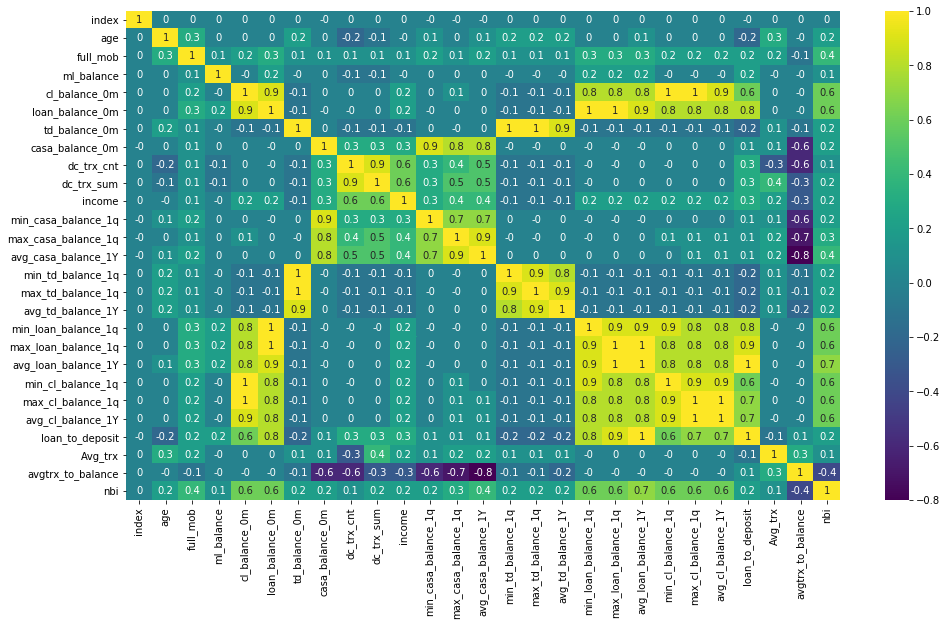

In [151]:
#Матрица корреляции
plt.figure(figsize=(16,9))
sns.heatmap(data=round(df.corr('spearman'),1)
           ,cmap='viridis'
           ,annot=True
           ,fmt='.1g')
plt.show()

# Распределение NBI по возрастам

## Можно заметить экстремальные значения NBI у людей 74 и 87 лет

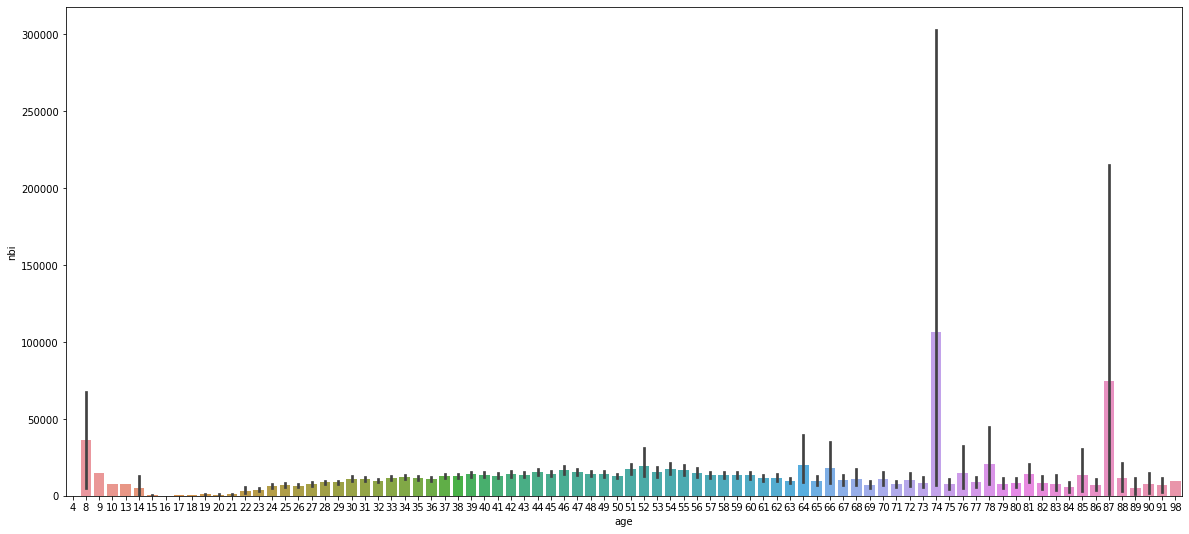

In [78]:
fig = plt.figure(figsize=(20,9))
sns.barplot(x=df['age'], y=df['nbi'])
plt.show()

In [165]:
people_74 = df[df['age'].isin([74])]
people_87 = df[df['age'].isin([87])]

106436.84910825624

# Средние nbi у возрастов 74 и 87

In [166]:
people_74['nbi'].mean()

106436.84910825624

In [167]:
people_87['nbi'].mean()

74685.14895344833

# В группе 74 экстремальный nbi = 4 691 795 имеет 1 человек 

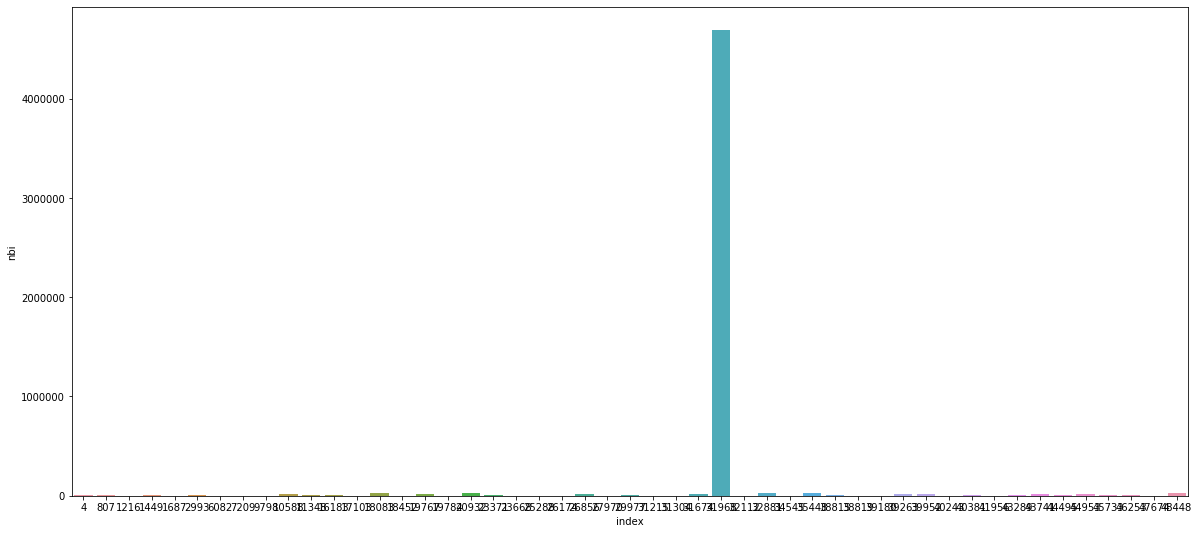

In [172]:
fig = plt.figure(figsize=(20,9))
sns.barplot(x=people_74['index'], y=people_74['nbi'])
plt.show()

In [174]:
people_74['nbi'].max()

4691795.5218

# В группе 87 экстремальный nbi = 421 947 имеет тоже только 1 человек

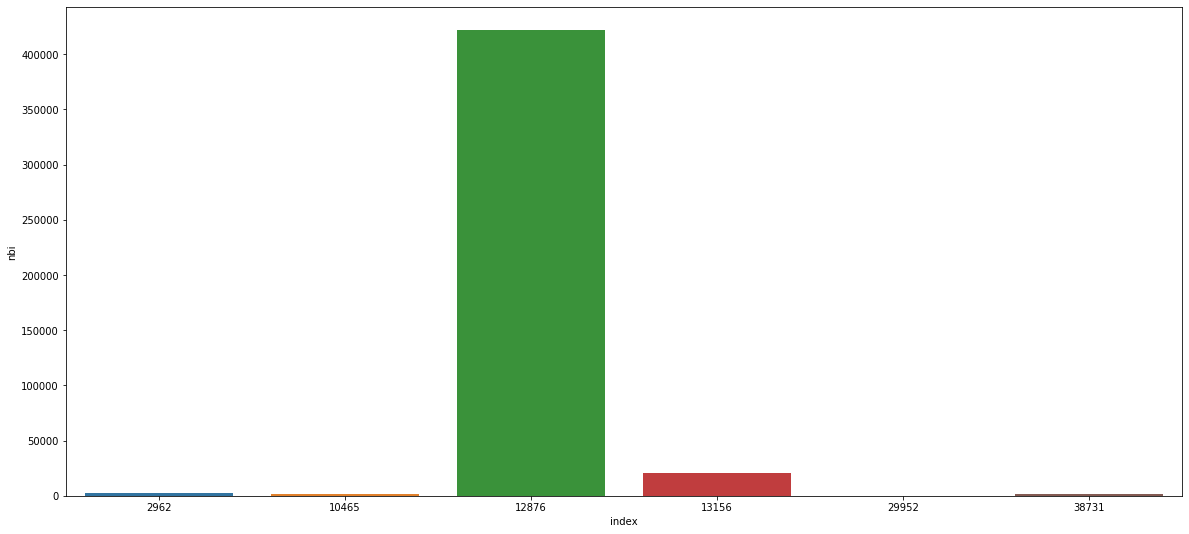

In [171]:
fig = plt.figure(figsize=(20,9))
sns.barplot(x=people_87['index'], y=people_87['nbi'])
plt.show()

In [175]:
people_87['nbi'].max()

421947.30159